In [287]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn import  metrics
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pickle


# Train Data Pre-processsing

In [288]:
#Reading csv file
mydata = pd.read_csv("train-data.csv")
data1 = mydata.copy()
data1.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [289]:
#removing unnamed column with rows
data1.drop("Unnamed: 0", axis =1, inplace= True) 
#adding how many years of working.
data1['No._of_Years'] = 2021 - data1['Year']

In [290]:
#encoding string to integer
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

data1.loc[:,'Fuel_Type'] = le1.fit_transform(data1['Fuel_Type'])
data1.loc[:,'Transmission'] = le2.fit_transform(data1['Transmission'])
data1.loc[:,'Owner_Type'] = le3.fit_transform(data1['Owner_Type'])
data1.loc[:,'Seats'] = le4.fit_transform(data1['Seats'])

data1.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,No._of_Years
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,3,NaN,1.75,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,3,NaN,12.50,6
2,Honda Jazz V,Chennai,2011,46000,4,1,0,18.2 kmpl,1199 CC,88.7 bhp,3,8.61 Lakh,4.50,10
3,Maruti Ertiga VDI,Chennai,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,5,NaN,6.00,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,3,NaN,17.74,8


In [291]:
#calculate the null values , #information about dataset
data1.isnull().sum(),data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int64  
 5   Transmission       6019 non-null   int64  
 6   Owner_Type         6019 non-null   int64  
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              6019 non-null   int64  
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
 13  No._of_Years       6019 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 658.5+ KB


(Name                    0
 Location                0
 Year                    0
 Kilometers_Driven       0
 Fuel_Type               0
 Transmission            0
 Owner_Type              0
 Mileage                 2
 Engine                 36
 Power                  36
 Seats                   0
 New_Price            5195
 Price                   0
 No._of_Years            0
 dtype: int64, None)

In [292]:
#removing null values in the place of new values

'''initially, filling Engine, Power and Mileage with 0.00 value. 
After converting these columns to int64 or float64, will fill avg inplace of 0'''

data1['New_Price'].fillna(value='0.00 Lakh', inplace=True)
data1['Seats'].fillna(round(data1['Seats'].mean()), inplace=True)   # mean, mode, median
data1['Engine'].fillna('0 CC', inplace=True)
data1['Power'].fillna('0.01 bhp', inplace=True)
data1['Mileage'].fillna('0.01 kmpl', inplace=True)  # mileage is already having value 0, so filling null values with 0.01 initially.


In [293]:
# Splitting string and converting numerical value to int or float
for i in range(len(data1)):
        data1['Engine'][i] = int(data1['Engine'][i].split()[0])
        data1['Mileage'][i] = float(data1['Mileage'][i].split()[0])
        data1['New_Price'][i] = float(data1['New_Price'][i].split()[0])
        
        # power is having some null values -> example: 'null bhp', there are 107 values like this.
        if data1['Power'][i].split()[0] !='null':
            data1['Power'][i] = float(data1['Power'][i].split()[0])
        elif data1['Power'][i].split()[0] =='null':
            data1['Power'][i] = 0.0
    

In [294]:
len(data1[data1['Engine'] == 0]), len(data1[data1['Mileage'] == 0.01]), len(data1[data1['New_Price'] == 0]), len(data1[data1['Power'] == 0])

(36, 2, 5195, 107)

In [295]:
# filling average value inplace of 0
for i in range(len(data1)):
    if data1['Engine'][i] == 0:
        data1['Engine'][i] = data1['Engine'].mean()
    if data1['Mileage'][i] == 0.01:
        data1['Mileage'][i] = data1['Mileage'].mean()
    if data1['Power'][i] == 0.01:
        data1['Power'][i] = data1['Power'].mean()
    


In [296]:
# Converting to float datatype
data1['Engine'] = data1['Engine'].astype("float64")
data1['Mileage'] = data1['Mileage'].astype("float64")
data1['Power'] = data1['Power'].astype("float64")
data1['New_Price'] = data1['New_Price'].astype("float64")

In [297]:
data1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,No._of_Years
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,0,1,0,26.60,998.0,58.16,3,0.00,1.75,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,1,0,19.67,1582.0,126.20,3,0.00,12.50,6
2,Honda Jazz V,Chennai,2011,46000,4,1,0,18.20,1199.0,88.70,3,8.61,4.50,10
3,Maruti Ertiga VDI,Chennai,2012,87000,1,1,0,20.77,1248.0,88.76,5,0.00,6.00,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,0,2,15.20,1968.0,140.80,3,0.00,17.74,8


In [298]:
#Conformation
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int64  
 5   Transmission       6019 non-null   int64  
 6   Owner_Type         6019 non-null   int64  
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   int64  
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
 13  No._of_Years       6019 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 658.5+ KB


# Test Data Pre-processing

In [299]:
#reading test csv file
mydata = pd.read_csv("test-data.csv")
data2 = mydata.copy()
data2.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [300]:
#removing unnamed column with rows
data2.drop("Unnamed: 0", axis =1, inplace= True) 
#adding how many years of working.
data2['No._of_Years'] = 2021 - data2['Year']

In [301]:
#converting string to int 
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

data2.loc[:,'Fuel_Type'] = le1.fit_transform(data2['Fuel_Type'])
data2.loc[:,'Transmission'] = le2.fit_transform(data2['Transmission'])
data2.loc[:,'Owner_Type'] = le3.fit_transform(data2['Owner_Type'])
data2.loc[:,'Seats'] = le4.fit_transform(data2['Seats'])

data2.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,No._of_Years
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,0,1,0,32.26 km/kg,998 CC,58.2 bhp,1,NaN,7
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,3,1,2,24.7 kmpl,796 CC,47.3 bhp,2,NaN,8
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,1,1,0,13.68 kmpl,2393 CC,147.8 bhp,4,25.27 Lakh,4
3,Toyota Etios Liva GD,Hyderabad,2012,139000,1,1,0,23.59 kmpl,1364 CC,null bhp,2,NaN,9
4,Hyundai i20 Magna,Mumbai,2014,29000,3,1,0,18.5 kmpl,1197 CC,82.85 bhp,2,NaN,7


In [302]:
data2.isnull().sum(),data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               1234 non-null   object
 1   Location           1234 non-null   object
 2   Year               1234 non-null   int64 
 3   Kilometers_Driven  1234 non-null   int64 
 4   Fuel_Type          1234 non-null   int64 
 5   Transmission       1234 non-null   int64 
 6   Owner_Type         1234 non-null   int64 
 7   Mileage            1234 non-null   object
 8   Engine             1224 non-null   object
 9   Power              1224 non-null   object
 10  Seats              1234 non-null   int64 
 11  New_Price          182 non-null    object
 12  No._of_Years       1234 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 125.5+ KB


(Name                    0
 Location                0
 Year                    0
 Kilometers_Driven       0
 Fuel_Type               0
 Transmission            0
 Owner_Type              0
 Mileage                 0
 Engine                 10
 Power                  10
 Seats                   0
 New_Price            1052
 No._of_Years            0
 dtype: int64, None)

In [303]:

data2['New_Price'].fillna(value='0.00 Lakh', inplace=True)
data2['Engine'].fillna('0 CC', inplace=True)
data2['Power'].fillna('0.01 bhp', inplace=True)
data2['Mileage'].fillna('0.01 kmpl', inplace=True)  # mileage is already having value 0, so filling null values with 0.01 initially.

In [304]:
#CONVERTing string to float by spliting in to two values and converting only zeroth position
for i in range(len(data2)):
  data2['Mileage'][i] = float(data2['Mileage'][i].split()[0])
  data2['New_Price'][i] = float(data2['New_Price'][i].split()[0])
  data2['Engine'][i] = float(data2['Engine'][i].split()[0])

  # power is having some null values -> example: 'null bhp', there are 107 values like this.
  if data2['Power'][i].split()[0] !='null':
     data2['Power'][i] = float(data2['Power'][i].split()[0])
  elif data2['Power'][i].split()[0] =='null':
       data2['Power'][i] = 0.0

In [305]:
#mileage has 00l it makes as a mean of mileage data 
for i in range(len(data2)):
  if data2['Mileage'][i] == 0.01:
     data2['Mileage'][i] = data2['Mileage'].mean()
  if data2['Engine'][i] == 0.00:
     data2['Engine'][i] = data2['Engine'].mean()
  if data2['Power'][i] == 0.01:
     data2['Power'][i] = data2['Power'].mean()   


In [306]:
# converting mileage to float
data2['Mileage'] = data2['Mileage'].astype("float64")  
data2['New_Price'] = data2['New_Price'].astype("float64")
data2['Engine'] = data2['Engine'].astype("float64") 
data2['Power'] = data2['Power'].astype("float64")

In [307]:
data2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,No._of_Years
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,0,1,0,32.26,998.0,58.20,1,0.00,7
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,3,1,2,24.70,796.0,47.30,2,0.00,8
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,1,1,0,13.68,2393.0,147.80,4,25.27,4
3,Toyota Etios Liva GD,Hyderabad,2012,139000,1,1,0,23.59,1364.0,0.00,2,0.00,9
4,Hyundai i20 Magna,Mumbai,2014,29000,3,1,0,18.50,1197.0,82.85,2,0.00,7


In [308]:
#Conformation 
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   int64  
 5   Transmission       1234 non-null   int64  
 6   Owner_Type         1234 non-null   int64  
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   int64  
 11  New_Price          1234 non-null   float64
 12  No._of_Years       1234 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 125.5+ KB


#Using data

In [309]:
#Traing and testing using csv files 
x_train = data1.drop(['Name','Location','Price','Year'],axis=1)
y_train =data1[['Price']]
x_test = data2.drop(['Name','Location','Year'],axis=1)
y_train=y_train.astype('int')

In [310]:
print(x_train.head(),y_train.head(),x_test.head(),sep='\n\n\n')

   Kilometers_Driven  Fuel_Type  Transmission  ...  Seats  New_Price  No._of_Years
0              72000          0             1  ...      3       0.00            11
1              41000          1             1  ...      3       0.00             6
2              46000          4             1  ...      3       8.61            10
3              87000          1             1  ...      5       0.00             9
4              40670          1             0  ...      3       0.00             8

[5 rows x 10 columns]


   Price
0      1
1     12
2      4
3      6
4     17


   Kilometers_Driven  Fuel_Type  Transmission  ...  Seats  New_Price  No._of_Years
0              40929          0             1  ...      1       0.00             7
1              54493          3             1  ...      2       0.00             8
2              34000          1             1  ...      4      25.27             4
3             139000          1             1  ...      2       0.00             9
4     

# Using Linear Regression algorithem





In [311]:
#Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#train the model
regressor.fit(x_train, y_train)
# y_train=y_train.astype('int')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [312]:
#predicting the model
y_pred=regressor.predict(x_train)

In [313]:
#using root mean square error
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_pred,y_train)))
rmse_dt = np.sqrt(metrics.mean_squared_error(y_pred,y_train))

Root mean squared error 6.327967738124394


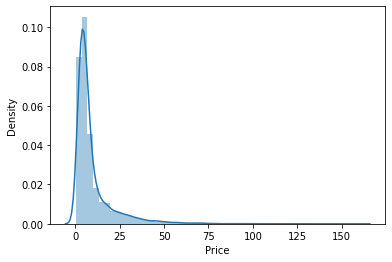

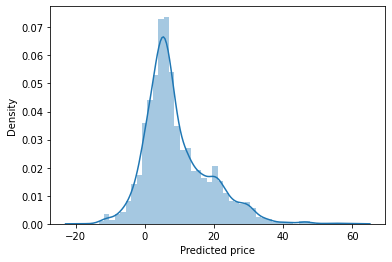

In [314]:
# plot the graph actual price and predicted price
sns.distplot(data1['Price'])
plt.show()
print('\n\n')
sns.distplot(y_pred,axlabel='Predicted price')
plt.show()

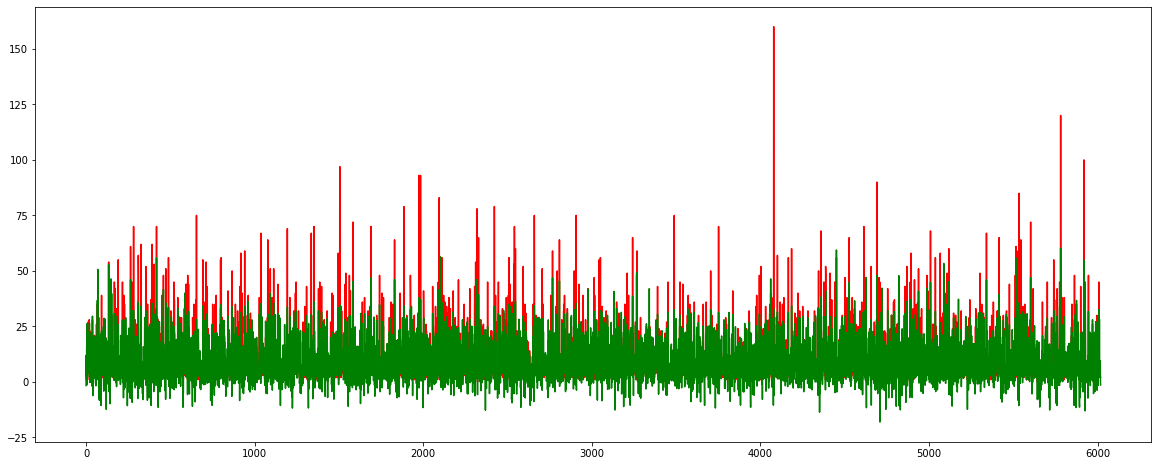

In [315]:
#plotting actualprice and predicted price 
plt.figure(figsize = (20,8))
plt.plot(y_train['Price'], 'r')
plt.plot(y_pred,'g')
plt.show()

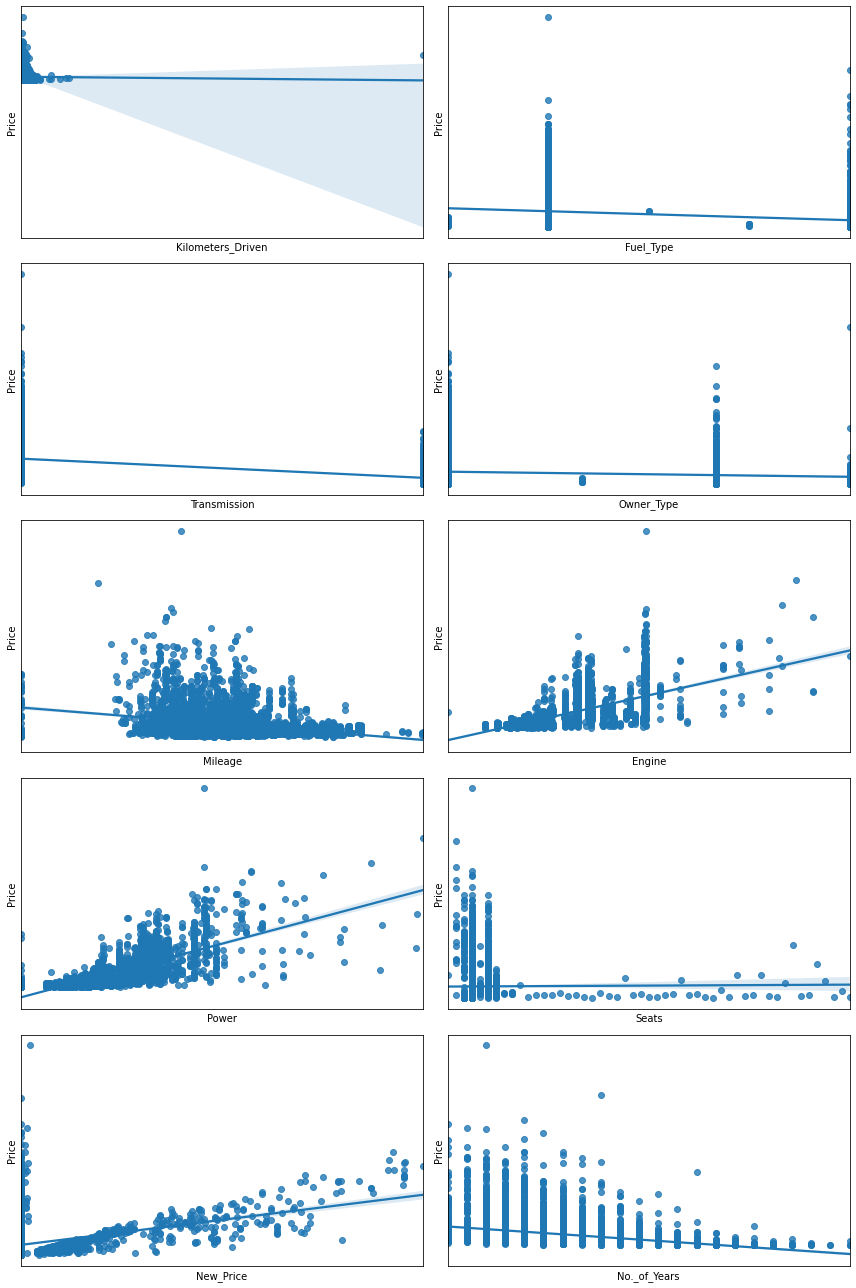

In [316]:
#We plot the all columns in xtrain
fig = plt.figure(figsize=(12,18))
for i in range(len(x_train.columns)):
    fig.add_subplot(5,2,i+1)
    sns.regplot(x=x_train.columns[i], y='Price', data=data1)
    plt.xlabel(x_train.columns[i])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()



# Using Random forest Regressor Algorithem

In [317]:
#Training and test the model usig csv file
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20,random_state =0)
regressor.fit(x_train,y_train)
y_pred =regressor.predict(x_train)

In [318]:
#using root mean square error
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_pred,y_train)))
print('mean squared error',metrics.mean_squared_error(y_pred,y_train))
print('mean obsolute error',metrics.mean_absolute_error(y_pred,y_train))

Root mean squared error 1.578462238493685
mean squared error 2.4915430383504953
mean obsolute error 0.645257656310572


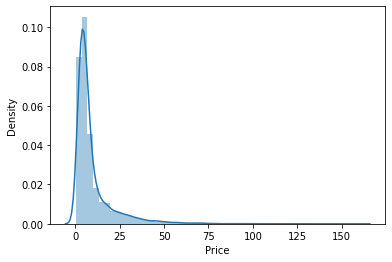

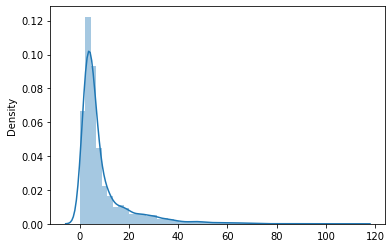

In [319]:
# plot the graph actual price and predicted price
sns.distplot(data1['Price'])
plt.show()
sns.distplot(y_pred)
plt.show()

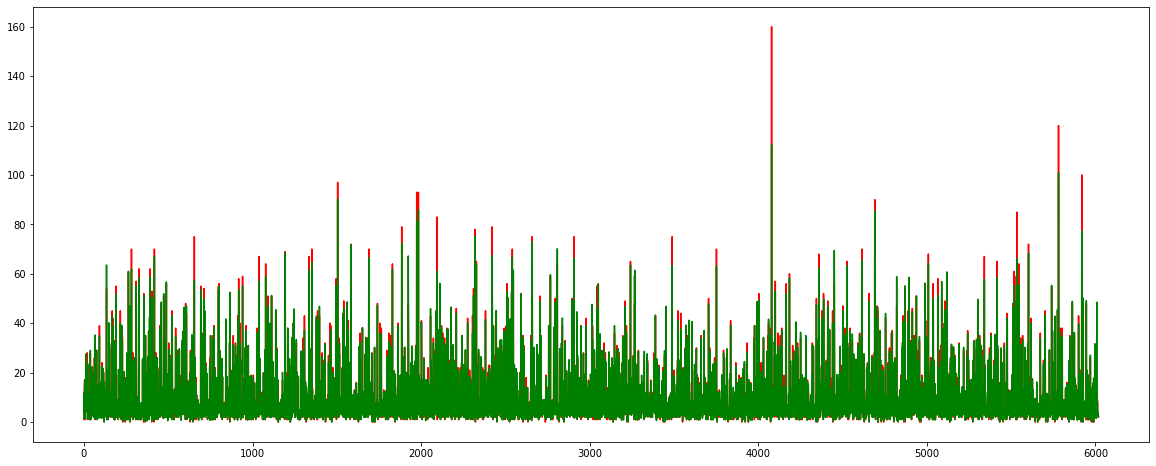

In [320]:
# plot the graph actual price and predicted price
plt.figure(figsize = (20,8))
plt.plot(y_train['Price'], 'r')
plt.plot(y_pred,'g')
plt.show()

# using KNN Algorithm


In [321]:
#Traing and testing the model using csv file
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train['Price'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [322]:
#predicting the price
y_pred =knn.predict(x_train)#x_test

In [323]:
#Rmse
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_pred,y_train)))

Root mean squared error 5.868598802295941


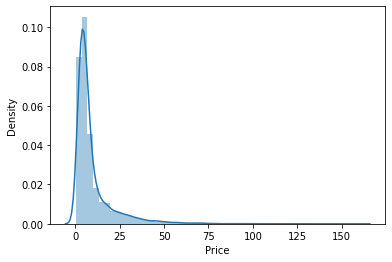

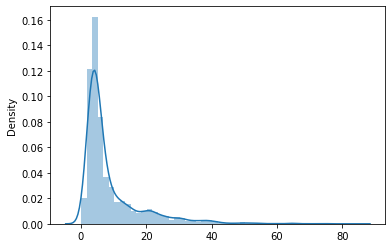

In [324]:
#visulaize actual value and predicted value
sns.distplot(data1['Price'])
plt.show()
sns.distplot(y_pred)
plt.show()


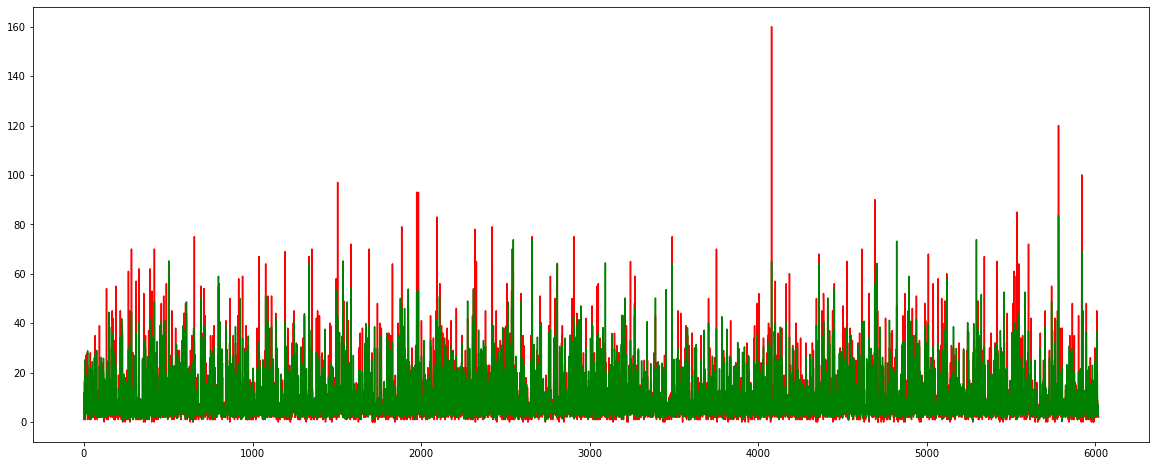

In [325]:
#plot the actual value and predicted value
plt.figure(figsize = (20,8))
plt.plot(y_train['Price'], 'r')
plt.plot(y_pred,'g')
plt.show()

# Using DecisionTreeRegressor Algorithem

Most accuracy algorithem for Used car price prediction

In [326]:
#Training the model and test using csv file
from sklearn.tree import DecisionTreeRegressor
decision = DecisionTreeRegressor(criterion='mse',max_depth=25,min_samples_leaf = 1)
#train the model
decision.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=25,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [327]:
#predicting and rmse
y_pred1 = decision.predict(x_train)
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_pred1,y_train)))

Root mean squared error 0.11362179483692422


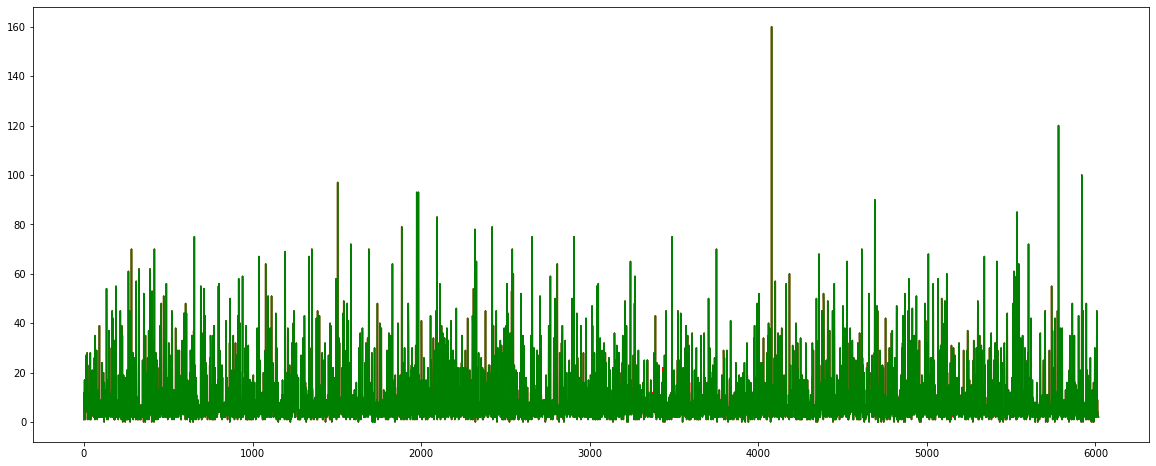

In [328]:
# plot the graph actual price and predicted price
plt.figure(figsize = (20,8))
plt.plot(y_train['Price'], 'r')
plt.plot(y_pred1,'g')
plt.show()
# values are overlapping, so we can say that Decision Tree working Perfect.

In [329]:
y_pred = decision.predict(x_test)

In [330]:
#added another cell for predicted prices
data2.loc[ : ,'Predicted_price'] = y_pred

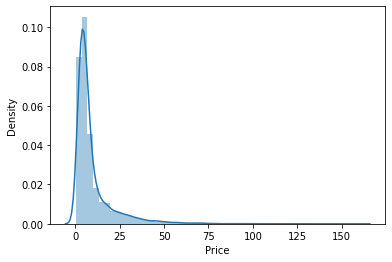

In [331]:
sns.distplot(data1['Price'])
plt.show()

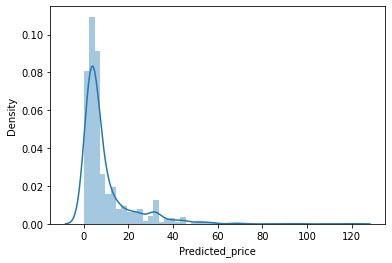

In [332]:
sns.distplot(data2['Predicted_price'])
plt.show()

In [333]:
data2

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,No._of_Years,Predicted_price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,0,1,0,32.26,998.0,58.20,1,0.00,7,3.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,3,1,2,24.70,796.0,47.30,2,0.00,8,2.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,1,1,0,13.68,2393.0,147.80,4,25.27,4,21.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,1,1,0,23.59,1364.0,0.00,2,0.00,9,2.0
4,Hyundai i20 Magna,Mumbai,2014,29000,3,1,0,18.50,1197.0,82.85,2,0.00,7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,1,1,0,20.54,1598.0,103.60,2,0.00,10,3.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,3,0,0,17.21,1197.0,103.60,2,0.00,6,6.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,1,1,0,23.08,1461.0,63.10,2,0.00,9,2.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,3,0,3,17.20,1197.0,103.60,2,0.00,8,4.0


In [334]:
#let visulaize the tree using graphviz
from sklearn.tree import export_graphviz

export_graphviz(decision, out_file = 'regression_tree.dot')

#Final conclusion using decision tree

In [335]:
#converting into binary file
pickle.dump(decision, open('decisontree.pkl','wb'))
model = pickle.load(open('decisontree.pkl','rb'))

In [336]:
#predicted price 
print('Transmission:  Enter 0:Automatic   Enter 1:Manual')
print('Fueltype:       Enter 0:CNG ,   Enter 1:Diesel ,    Enter 2:LPG,   Enter 3:petrol')
print('Owner type:  Enter 0:first hand   ,      Enter 1: forth and above ,       enter 2: second    ,enter 3: third')
print('predicted price is',model.predict([[
                      int(input('Kilometers_Driven')),
                      int(input('Fuel_Type')),
                      int(input('Transmission')),
                      int(input('Owner_Type')),
                      float(input('Mileage')),
                      float(input('Engine')),
                      float(input('Power')),
                      int(input('Seats')),
                      float(input('New_Price')),
                      int(input('No._of_Years'))

                      	]]))

Transmission:  Enter 0:Automatic   Enter 1:Manual
Fueltype:       Enter 0:CNG ,   Enter 1:Diesel ,    Enter 2:LPG,   Enter 3:petrol
Owner type:  Enter 0:first hand   ,      Enter 1: forth and above ,       enter 2: second    ,enter 3: third
Kilometers_Driven96000
Fuel_Type1
Transmission1
Owner_Type0
Mileage56
Engine988
Power500
Seats4
New_Price22
No._of_Years4
predicted price is [68.]
